# Anomaly Detection Algorithm Demos

## IQR (Interqualtile Range)

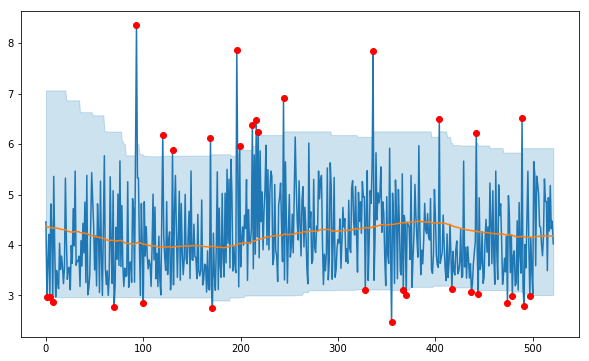

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from sample_data import get_data_csv
import anom_algorithms

data = get_data_csv()
df = anom_algorithms.run_with_iqr(data, 95, 200)

plt.figure(figsize = (10, 6))
plt.fill_between(df.index, df['max'].values, df['min'].values, color='#0072B2', alpha=0.2)
plt.plot(df.index, df['raw'].values)
plt.plot(df.index, df['mean'].values)

for i in range(len(df)):
    raw_row = df.values[i]
    if raw_row[2] > raw_row[1] or raw_row[2] < raw_row[0]:
        plt.plot(df.index[i], raw_row[2], 'ro')

## MAD (Median Absolute Deviation)

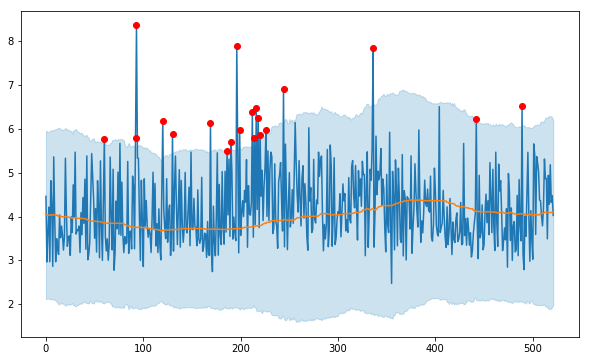

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from sample_data import get_data_csv
import anom_algorithms

data = get_data_csv()
df = anom_algorithms.run_with_mad(data, 3, 15)

plt.figure(figsize = (10, 6))
plt.fill_between(df.index, df['max'].values, df['min'].values, color='#0072B2', alpha=0.2)
plt.plot(df.index, df['raw'].values)
plt.plot(df.index, df['mean'].values)

for i in range(len(df)):
    raw_row = df.values[i]
    if raw_row[2] > raw_row[1] or raw_row[2] < raw_row[0]:
        plt.plot(df.index[i], raw_row[2], 'ro')

## Prophet (from facebook)

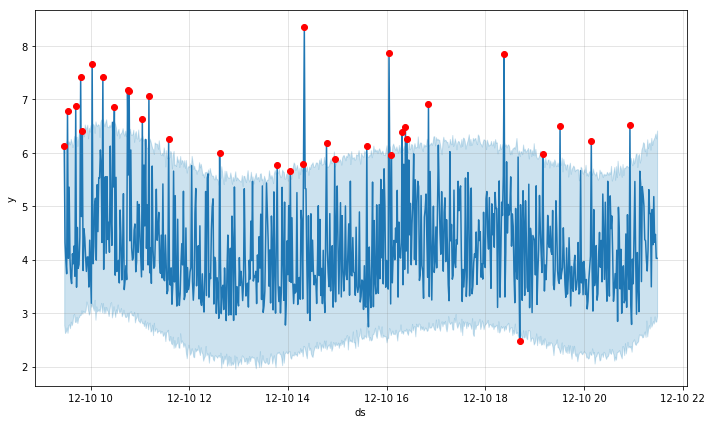

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from sample_data import get_data_csv
from myprophet import MyProphet

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = get_data_csv()
m = MyProphet(interval_width = 0.95, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
m.fit(df)

future = m.make_future_dataframe(periods = 0)
forecast = m.predict(future)
m.plot(forecast)

for i in range(len(forecast.values)):
    p = forecast.values[i]
    current = df['y'][i]
    ds = p[0]
    lower = p[2]
    upper = p[3]

    if current is None or lower is None or upper is None:
        continue

    current = float(current)
    if current > upper or current < lower:
        plt.plot(ds, current, 'ro')